# Exercise


Use this dataset: 
https://raw.githubusercontent.com/abulbasar/data/master/Combined_Cycle_Power_Plant.csv

Description of the dataset
http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

Steps
1. Load the dataset
2. Apply one-hot-encoding if necessary
3. Divide the database into training and test set using random seed 1 and test size = 0.3
4. Normalize the training dataset
5. Fit a linear regression model
6. Apply fitted standard scaler on the testing dataset
7. Find prediction on test dataset
9. Find RMSE 

Note: there is a small deviation in the above steps from those in the demo. In the demo we ran normalization (z-scoring) on the full datset before splitting into training and test set. That was done to keep the process simple. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import * 

In [3]:
df = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
AT    47840 non-null float64
V     47840 non-null float64
AP    47840 non-null float64
RH    47840 non-null float64
EP    47840 non-null float64
dtypes: float64(5)
memory usage: 1.8 MB


In [5]:
y = df.EP
X = df.iloc[:, :-1]

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                        test_size = 0.3, random_state = 1)

In [12]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [9]:
lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
X_test_std = scaler.transform(X_test)

In [10]:
y_test_std = lr.predict(X_test_std)

In [11]:
metrics.r2_score(y_test, y_test_std)

0.92845027821893722

In [14]:
lr.coef_, lr.intercept_

(array([-14.73349561,  -2.96511136,   0.38338609,  -2.30766511]),
 454.43499641662686)

PE = a0 + a1 * AT + a2*V + a3 * RH + a4 * AP

In [15]:
pd.DataFrame({"feature": X.columns, "coef": lr.coef_})

,coef,feature
0,-14.733496,AT
1,-2.965111,V
2,0.383386,AP
3,-2.307665,RH


In [18]:
pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LinearRegression())
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.92845027821893722

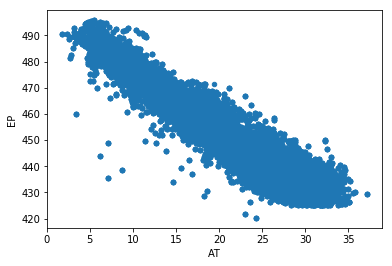

In [20]:
df.plot.scatter("AT", "EP")

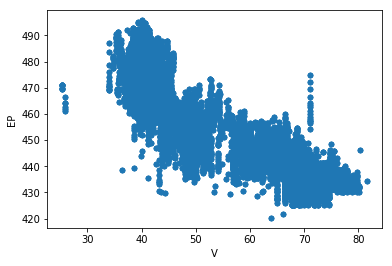

In [21]:
df.plot.scatter("V", "EP")

In [29]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree= 3, include_bias= False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LinearRegression())
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.94060706721909992

In [24]:
preprocessing.PolynomialFeatures?

In [26]:
a = np.array([
    [2, 3, 4],
    [-1, 4, 0],
    [3, 9, 7],
    [1, -1, 2]
])
preprocessing.PolynomialFeatures(degree=2, include_bias=False).fit_transform(a)

array([[  2.,   3.,   4.,   4.,   6.,   8.,   9.,  12.,  16.],
       [ -1.,   4.,   0.,   1.,  -4.,  -0.,  16.,   0.,   0.],
       [  3.,   9.,   7.,   9.,  27.,  21.,  81.,  63.,  49.],
       [  1.,  -1.,   2.,   1.,  -1.,   2.,   1.,  -2.,   4.]])

In [34]:
len(pipe.steps[2][1].coef_)

34